**Courtney Jackson, "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

# 0. Loading Dataset

In [27]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

from sklearn import linear_model

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE

In [3]:
#Load the dataset
tickets = pd.read_excel("data/train_test_dataset.xlsx")
tickets.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


# 1. Business and Data Understanding
### Task: Provide the problem statement and problem significance

#### Problem Statement: 
Build a model to determine which fans are more likely to defect as a season ticket holder.

#### Problem Significance: 
Intervene and prevent fans from defecting as season ticket holder.

# 2. Data Cleaning
### Task: Clean up the data

In [4]:
#Finding datatypes
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [6]:
#Finding missing values
tickets.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [7]:
#Replace blank cells with 'NaN'
tickets = tickets.replace(' ', np.nan)

In [8]:
#Finding total missing values
tickets.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [9]:
#Changing datatype for income
tickets['INCOME'] = pd.to_numeric(tickets['INCOME'])

In [10]:
#Dropping the following colums because they have too many null values and are not sigificant to the problem
del tickets['CHILD']
del tickets['SPORT']
del tickets['COMP']

In [13]:
#Showing the median values in the remaining columns with missing values
print tickets['AGE'].median()
print tickets['INCOME'].median()
print tickets['GNDR'].median()
print tickets['OWNHOME'].median()

63.0
3.0
0.0
1.0


In [14]:
#Replacing the null values with the median values
tickets = tickets.fillna({'AGE': 63})
tickets = tickets.fillna({'INCOME': 3})
tickets = tickets.fillna({'GNDR' : 0})
tickets = tickets.fillna({'OWNHOME' : 1})

In [15]:
#Now there are no missing values
tickets.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
PCTMARR     0
HOMEVAL     0
dtype: int64

# 3. Data Visualization
### Task: Use charts, plots, seaborn, and matplotlib

In [54]:
#Finding the mean value in each column based on if Year 1 ticket holders renewed or defected
tickets.groupby(['Y2defect']).mean()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,
0,0.385200,0.496094,0.656033,0.340929,0.550998,20.170356,6.777778,0.584418,62.074219,2.889757,0.419488,0.787109,58.536458,109.368273
1,0.288845,0.524957,0.617405,0.241319,0.409505,19.755859,5.978299,0.394531,61.406684,2.924262,0.426649,0.772135,57.920573,114.854167


* The average ticket price is roughly the same for both types of ticket holders (renewed and defected)
* The average year for a ticket holder is roughly within the same range for both types of ticket holders
* More ticket holders renew that are NOT part of their teams' backer club than those who are part of the backer club

In [56]:
#Finding the total count in each column based on if Year 1 ticket holders renewed or defected and their income
tickets.groupby(['Y2defect', 'INCOME']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS  BACKER  \
Y2defect INCOME                                                                 
0        0.0        441   441   441   441   441   441      441    441     441   
         1.0        661   661   661   661   661   661      661    661     661   
         2.0        445   445   445   445   445   445      445    445     445   
         3.0       1546  1546  1546  1546  1546  1546     1546   1546    1546   
         4.0        790   790   790   790   790   790      790    790     790   
         5.0        383   383   383   383   383   383      383    383     383   
         6.0        342   342   342   342   342   342      342    342     342   
1        0.0        434   434   434   434   434   434      434    434     434   
         1.0        626   626   626   626   626   626      626    626     626   
         2.0        408   408   408   408   408   408      408    408     408   
         3.0       1631  1631  1631  1631  1631  1631     1631   1631    1631   
         4.0        767   767   767   767   767   767      767    767     767   
         5.0        380   380   380   380   380   380      380    380     380   
         6.0        362   362   362   362   362   362      362    362     362   

                  AGE  GNDR  OWNHOME  PCTMARR  HOMEVAL  
Y2defect INCOME                                         
0        0.0      441   441      441      441      441  
         1.0      661   661      661      661      661  
         2.0      445   445      445      445      445  
         3.0     1546  1546     1546     1546     1546  
         4.0      790   790      790      790      790  
         5.0      383   383      383      383      383  
         6.0      342   342      342      342      342  
1        0.0      434   434      434      434      434  
         1.0      626   626      626      626      626  
         2.0      408   408      408      408      408  
         3.0     1631  1631     1631     1631     1631  
         4.0      767   767      767      767      767  
         5.0      380   380      380      380      380  
         6.0      362   362      362      362      362

* Based on average income, there are more ticket holders that did not renew than those who did

In [69]:
#Finding the total count in each column based on if Year 1 ticket holders renewed or defected and their income
tickets.groupby(['Y2defect', 'BACKER']).mean()

Y1G5      Y1G4      Y1G3      Y1G2      Y1G1    Y1price  \
Y2defect BACKER                                                                
0        0       0.404178  0.532637  0.614621  0.218277  0.432376  21.704961   
         1       0.371704  0.470108  0.685481  0.428147  0.635351  19.079094   
1        0       0.255556  0.570251  0.647670  0.133692  0.301792  20.082437   
         1       0.339934  0.455446  0.570957  0.406491  0.574807  19.254675   

                    YEARS        AGE    INCOME      GNDR   OWNHOME    PCTMARR  \
Y2defect BACKER                                                                 
0        0       5.403133  59.801044  3.070496  0.445431  0.798956  58.554569   
         1       7.755291  63.690680  2.761233  0.401040  0.778685  58.523580   
1        0       4.513978  58.631183  3.024731  0.431541  0.772401  57.311111   
         1       8.225523  65.666117  2.770077  0.419142  0.771727  58.855886   

                    HOMEVAL  
Y2defect BACKER              
0        0       115.974413  
         1       104.670628  
1        0       119.323297  
         1       107.995600

* If a fan was part of their team's backer club, they renewed for a second year (based on each game they went to in the season)

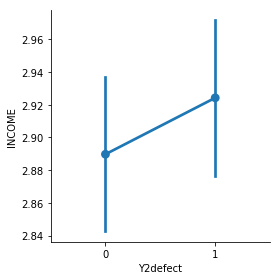

In [61]:
#Factorplot for Y2defect and INCOME variables
sns.factorplot("Y2defect", "INCOME", data=tickets)

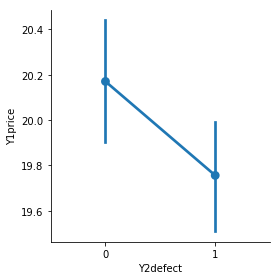

In [62]:
#Factorplot for Y2defect and Y1price variables
sns.factorplot("Y2defect", "Y1price", data=tickets)

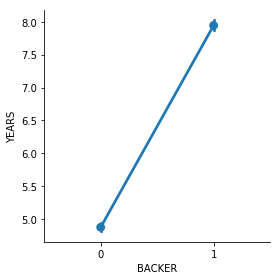

In [68]:
#Factorplot for Y2defect and Y1price variables
sns.factorplot("BACKER", "YEARS", data=tickets)

Y2defect
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

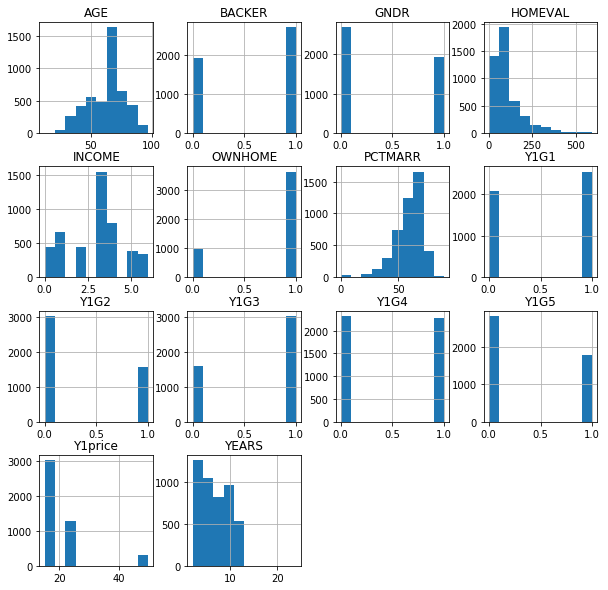

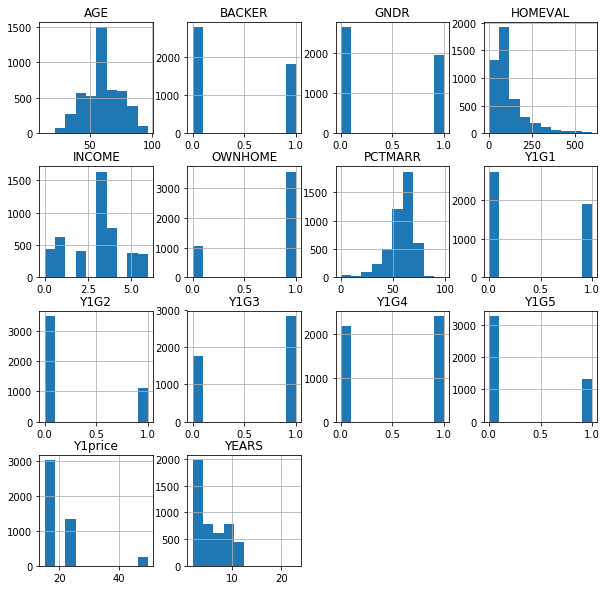

In [63]:
#Histograms based on Y2defect variable
tickets.groupby('Y2defect').hist(figsize=(10,10))

# 4. Exploratory Data Analysis
### Task: Use heatmap and correlation analysis

In [16]:
#Correlations
tickets.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.022697,0.010530,0.007248,-0.018063,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.028507,-0.000865,-0.005599,0.021317,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061787,0.006825,0.002400,0.043924,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.025990,0.020746,0.000198,-0.029841,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.096830,-0.013631,-0.009714,-0.002148,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.085067,-0.028290,-0.025717,-0.002415,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.029670,0.071470,0.042429,-0.018103,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.281932,-0.089712,-0.020403,-0.003753,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.182871,-0.084987,-0.029201,-0.008838,0.032558,-0.064727
AGE,-0.022697,0.028507,-0.061787,-0.025990,0.096830,0.085067,-0.029670,0.281932,0.182871,1.000000,-0.217381,0.012516,-0.060849,-0.053910,-0.014759


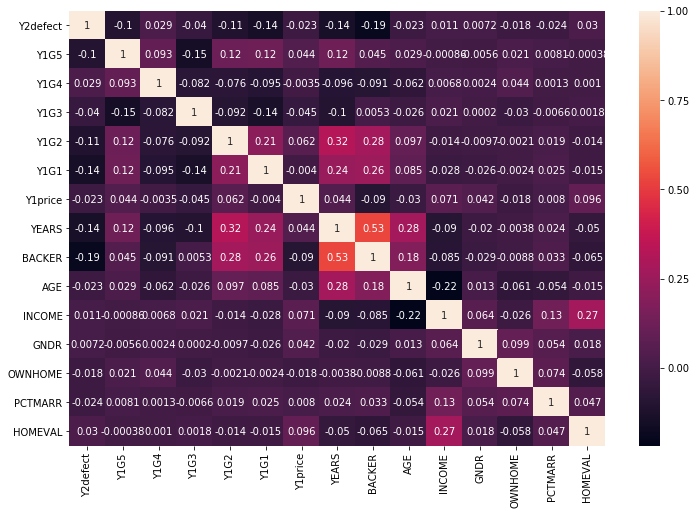

In [19]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(tickets.corr(), annot=True)

#### Interpretation of results above:
* There is a significant positive relationship between being a backer and the number of years

# 5. Models of the Dataset
### Task: Build models based on the dataset

## 5a. Model Building

In [17]:
#Declaring variables and decision tree for the first model
y = tickets['Y2defect']
X = tickets[['INCOME', 'YEARS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
#Printing the results for the first model
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.569981916817
[[1061  302]
 [ 887  515]]
             precision    recall  f1-score   support

          0       0.54      0.78      0.64      1363
          1       0.63      0.37      0.46      1402

avg / total       0.59      0.57      0.55      2765

0.57288115814


In [37]:
#Creating the first validation set and finding datatypes
validation = tickets[['INCOME', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 2 columns):
INCOME    9216 non-null float64
YEARS     9216 non-null int64
dtypes: float64(1), int64(1)
memory usage: 144.1 KB


In [45]:
#Declaring variables and decision tree for the second model
y = tickets['Y2defect']
X = tickets[['Y1price', 'INCOME']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
#Printing the results for the second model
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.514285714286
[[594 769]
 [574 828]]
             precision    recall  f1-score   support

          0       0.51      0.44      0.47      1363
          1       0.52      0.59      0.55      1402

avg / total       0.51      0.51      0.51      2765

0.513194126826


In [47]:
#Creating the second validation set and finding datatypes
validation_2 = tickets[['Y1price', 'INCOME']]
validation_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 2 columns):
Y1price    9216 non-null int64
INCOME     9216 non-null float64
dtypes: float64(1), int64(1)
memory usage: 144.1 KB


## 5b. Model Selection

In [38]:
#Applying the decision tree to the first validation set
output_scoring = dt.predict(validation)

In [39]:
#Finding the probability of renewing and defecting fans
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])
probs.head(20)

,prob of Renewal,prob of Defect
0,0.672414,0.327586
1,0.312925,0.687075
2,0.533333,0.466667
3,0.513699,0.486301
4,0.605769,0.394231
5,0.000000,1.000000
6,0.552941,0.447059
7,0.622951,0.377049
8,0.507299,0.492701
9,0.312925,0.687075


In [40]:
#Selecting the ID column
fakeid = pd.DataFrame(tickets['FAKEID'])
fakeid.head()

,FAKEID
0,580V74KT
1,298S54OK
2,268D25AO
3,312Q12WV
4,420R23VB


In [41]:
#Joining the three columns in a new dataframe
risky_fans = fakeid.join(probs)
risky_fans.head()

,FAKEID,prob of Renewal,prob of Defect
0,580V74KT,0.672414,0.327586
1,298S54OK,0.312925,0.687075
2,268D25AO,0.533333,0.466667
3,312Q12WV,0.513699,0.486301
4,420R23VB,0.605769,0.394231


In [42]:
#Finding the predicted defect based on the other two columns; prob of renewal and prob of defect
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

In [43]:
#Loading the new full dataframe
risky_fans.head(20)

,FAKEID,prob of Renewal,prob of Defect,Predicted Defect
0,580V74KT,0.672414,0.327586,0
1,298S54OK,0.312925,0.687075,1
2,268D25AO,0.533333,0.466667,0
3,312Q12WV,0.513699,0.486301,0
4,420R23VB,0.605769,0.394231,0
5,611B52LL,0.000000,1.000000,1
6,612W26VA,0.552941,0.447059,0
7,594Y59EZ,0.622951,0.377049,0
8,610K33YD,0.507299,0.492701,0
9,716W84WL,0.312925,0.687075,1


In [48]:
#Applying the decision tree to the second validation dataset
output_scoring = dt.predict(validation_2)

In [49]:
#Finding the probability of renewing and defecting fans
probs_2 = dt.predict_proba(validation_2)
probs_2 = pd.DataFrame(probs_2, columns=['prob of Renewal', 'prob of Defect'])
probs_2.head(20)

,prob of Renewal,prob of Defect
0,0.489451,0.510549
1,0.479556,0.520444
2,0.542234,0.457766
3,0.489451,0.510549
4,0.489451,0.510549
5,0.517937,0.482063
6,0.552756,0.447244
7,0.509934,0.490066
8,0.472527,0.527473
9,0.479556,0.520444


In [50]:
#Selecting the ID column
fakeid = pd.DataFrame(tickets['FAKEID'])
fakeid.head()

,FAKEID
0,580V74KT
1,298S54OK
2,268D25AO
3,312Q12WV
4,420R23VB


In [51]:
#Joining the three columns in a new dataframe
risky_fans_2 = fakeid.join(probs_2)
risky_fans_2.head()

,FAKEID,prob of Renewal,prob of Defect
0,580V74KT,0.489451,0.510549
1,298S54OK,0.479556,0.520444
2,268D25AO,0.542234,0.457766
3,312Q12WV,0.489451,0.510549
4,420R23VB,0.489451,0.510549


In [52]:
#Finding the predicted defect based on the other two columns; prob of renewal and prob of defect
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans_2 = risky_fans_2.join(predicted_y)

In [53]:
#Loading the new full dataframe
risky_fans_2.head(20)

,FAKEID,prob of Renewal,prob of Defect,Predicted Defect
0,580V74KT,0.489451,0.510549,1
1,298S54OK,0.479556,0.520444,1
2,268D25AO,0.542234,0.457766,0
3,312Q12WV,0.489451,0.510549,1
4,420R23VB,0.489451,0.510549,1
5,611B52LL,0.517937,0.482063,0
6,612W26VA,0.552756,0.447244,0
7,594Y59EZ,0.509934,0.490066,0
8,610K33YD,0.472527,0.527473,1
9,716W84WL,0.479556,0.520444,1


# 6. Storytelling
### Task: Answer the following questions.

#### Who is likely to renew “season ticker”?
A fan is more likely to renew if they are part of their team's backer club and above average income.

#### Who is likely to defect?
A fan is more likely to defect if they are not part of their team' backer club and did not attend all five games in the season.

#### What actions do you recommend K-State Athletic Department (or other sports teams) to take?
Promoting fans to join their teams' backer club and to offer discounts for ticker holders that have been holders for a certain amount of consecutive years.

#### What additional variables would you need to improve the model prediction?
Specific income values for each member, how many games the team has won in a season, how many rival games the fan has been to.